<a href="https://colab.research.google.com/github/rozerinyildiz/MachineLearningProject/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(4,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
base_dir = '/content/drive/MyDrive/2022_All_Dataset'
bs=30         #Setting batch size

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

IMAGE_SIZE = 180
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(  #validation generator
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 823 images belonging to 4 classes.
Found 203 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
13/13 - 277s - loss: 1.3512 - acc: 0.3317 - val_loss: 1.3637 - val_acc: 0.3448 - 277s/epoch - 21s/step
Epoch 2/10
13/13 - 87s - loss: 1.2614 - acc: 0.4471 - val_loss: 1.0529 - val_acc: 0.5320 - 87s/epoch - 7s/step
Epoch 3/10
13/13 - 85s - loss: 1.0837 - acc: 0.5286 - val_loss: 0.9610 - val_acc: 0.5862 - 85s/epoch - 7s/step
Epoch 4/10
13/13 - 88s - loss: 0.9197 - acc: 0.5808 - val_loss: 0.8484 - val_acc: 0.6601 - 88s/epoch - 7s/step
Epoch 5/10
13/13 - 87s - loss: 0.7924 - acc: 0.6622 - val_loss: 0.7674 - val_acc: 0.6650 - 87s/epoch - 7s/step
Epoch 6/10
13/13 - 85s - loss: 0.6816 - acc: 0.6926 - val_loss: 0.8419 - val_acc: 0.6798 - 85s/epoch - 7s/step
Epoch 7/10
13/13 - 87s - loss: 0.6248 - acc: 0.7363 - val_loss: 0.7579 - val_acc: 0.6847 - 87s/epoch - 7s/step
Epoch 8/10
13/13 - 85s - loss: 0.5566 - acc: 0.7874 - val_loss: 0.9581 - val_acc: 0.6700 - 85s/epoch - 7s/step
Epoch 9/10
13/13 - 85s - loss: 0.5196 - acc: 0.7947 - val_loss: 0.7542 - val_acc: 0.6847 - 85s/epoch - 7s/ste

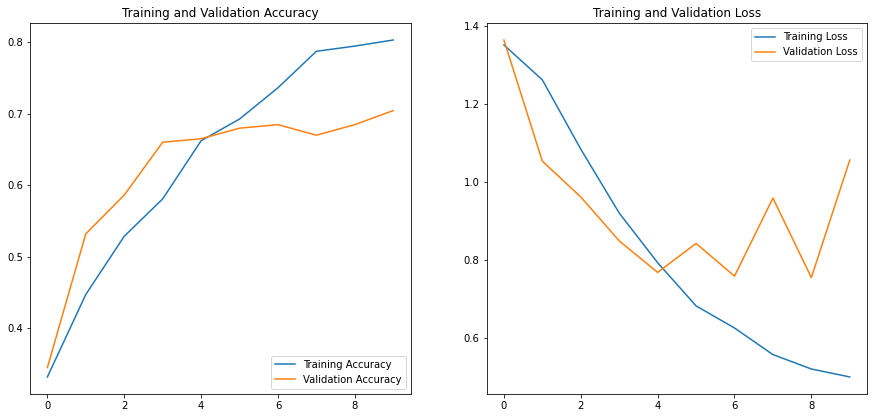

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os